# Import libraries: visualization, text analysis and classifiers

In [0]:
import nltk  
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.graph_objs as go

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

import nltk
import string
import nltk.corpus
import nltk.stem.snowball
from nltk.corpus import wordnet
# Get default English stopwords and extend with punctuation
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(string.punctuation)
stopwords.append('')



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, ImageColorGenerator

In [0]:
happy = pd.read_csv('/content/drive/My Drive/256/cleaned_hm.csv')
happy.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection


total number of missing data per column

In [0]:
happy.isnull().sum(axis = 0)

hmid                         0
wid                          0
reflection_period            0
original_hm                  0
cleaned_hm                   0
modified                     0
num_sentence                 0
ground_truth_category    86410
predicted_category           0
dtype: int64

In [0]:
demographic  = pd.read_csv('/content/drive/My Drive/256/demographic.csv')
demographic .head()

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y
2,3,25,IND,m,single,n
3,4,32,USA,m,married,y
4,5,29,USA,m,married,y


**clean demographic only once**

In [0]:
# RUN THIS FUNCTION ONLY ONCE AND SAVE demographic_cleaned.csv IN YOUR ACTIVE DIRECTORY
# clean_string function to remove text string but keep number string, float and integer
# I ran the clean_string function below only once and saved the cleaned dataframe as demographic_cleaned.csv
# For all subsequent analysis, I then import demographic_cleaned.csv directly in order to avoid cleaning data each time.

def clean_string(df, column):
   for i in range(0,len(df)):
       if type(df[column][i])==str:
           df[column][i] = df[column][i].split('.')[0]
           if df[column][i].isdigit()==False:
               df[column][i]=50
   return df
demographic = clean_string(demographic, 'age')

demographic.head(2)
demographic.to_csv("demographic_cleaned.csv", index=False)


Merging datasets

In [0]:
happy = pd.merge(happy, demographic, on='wid', validate = 'm:1')
happy.head(3)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,length,age,country,gender,marital,parenthood
0,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection,12,29,IND,m,married,y
1,27874,2,24h,I was very happy when my family brings me beau...,I was very happy when my family brings me beau...,True,1,NaN,affection,13,29,IND,m,married,y
2,28074,2,24h,I was happy when I got my new incentives from ...,I was happy when I got my new incentives from ...,True,1,NaN,achievement,13,29,IND,m,married,y


# Data import and preparation

In [0]:
happy.head()

,hmid,wid,cleaned_hm,num_sentence,predicted_category,length,age,country,gender,marital,parenthood,reflection_period
0,27674,2,I was happy when my son got 90% marks in his e...,1,6,12,29,0.0,0,1,1,0
1,27874,2,I was very happy when my family brings me beau...,1,6,13,29,0.0,0,1,1,0
2,28074,2,I was happy when I got my new incentives from ...,1,3,13,29,0.0,0,1,1,0
3,29946,2,When my family cooked my favorite food at night,1,6,9,29,0.0,0,1,1,0
4,30945,2,When my son got recovery from their disease,1,6,8,29,0.0,0,1,1,0


In [0]:
import pandas as pd
X = pd.read_csv('/content/drive/My Drive/256/Features.csv')
y = pd.read_csv('/content/drive/My Drive/256/Classes.csv')

# Create Model

Train Test Split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

In [0]:
from sklearn.ensemble import RandomForestClassifier

Grid Search

In [0]:
#from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}
#print(random_grid)

#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [0]:
#regr.fit(X_train,y_train)
#mysvm.fit(X_train,y_train)
#, n_iter = 100 cv = 2,
#rf_random = RandomizedSearchCV(estimator = myrandomF, param_distributions = random_grid, verbose=2, random_state=42, n_jobs =1)
#rf_random.fit(X_train,y_train)

In [0]:
#y_pred = rf_random.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_recall_curve, roc_curve, accuracy_score

In [0]:
#accuracy= accuracy_score(y_test,y_pred)

In [0]:
#accuracy

In [0]:
#rf_random.best_estimator_

Final Model

In [0]:
forest = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
forest.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predictions = forest.predict(X_test)

# Accuracy Measures

In [0]:
accuracy_score(y_test,predictions)

0.833729216152019

In [0]:
r2_score(y_test,predictions)

0.5710470900198965

In [0]:
from sklearn.metrics import classification_report
target_names = ['exercise','enjoy_the_moment','achievement','nature','bonding','affection','leisure']
print(classification_report(y_test,predictions,target_names =target_names))

                  precision    recall  f1-score   support

        exercise       0.93      0.53      0.68       107
enjoy_the_moment       0.82      0.47      0.60       943
     achievement       0.77      0.92      0.84      2594
          nature       0.88      0.48      0.62       150
         bonding       0.97      0.88      0.92       881
       affection       0.86      0.94      0.90      2696
         leisure       0.84      0.65      0.73       628

        accuracy                           0.83      7999
       macro avg       0.87      0.70      0.76      7999
    weighted avg       0.84      0.83      0.82      7999



In [0]:
"""'achievement'= 3
'affection'= 6
'bonding' = 5
'enjoy_the_moment'=2
'exercise'=1
'leisure'=7
'nature' = 4
"""

"'achievement'= 3\n'affection'= 6\n'bonding' = 5\n'enjoy_the_moment'=2\n'exercise'=1\n'leisure'=7\n'nature' = 4\n"

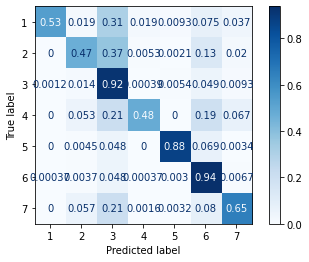

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(forest, X_test, y_test,
                                 cmap=plt.cm.Blues,
                             normalize = 'true')